# Store sales prediction

## Problem Statement
<div class="alert alert-block alert-success">
    <b>A retail store wants to understand and predict the sales of various items in their outlets. They have collected data on different features of the items and the outlets. The store wants to leverage this data to build a predictive model that can accurately estimate the sales of items based on their characteristics and the outlet's information.</b>

## Data Directory
**Item_Identifier:** A unique identifier for each item in the store.

**Item_Weight:** The weight of the item.

**Item_Fat_Content:** The level of fat content in the item (e.g., low fat, regular)

**Item_Visibility:** The percentage of total display are allocated to the item in the store.

**Item_Type:** The category or type of the item.

**Item_MRP:** The maximum retail price of the item.

**Outlet_Identifier:** A unique identifier for each outlet in the store chain.

**Outlet_Establishment_Year:** The year when the outlet was established.

**Outlet_Size:** The size of the outlet (e.g., small, medium, large).

**Outlet_Location_Type:** The type of location where the outlet is situated (e.g., Tier 1, Tier 2).

**Outlet_Type:** The type of outlet (e.g., Supermarket Type 1, Supermarket Type 2, Supermarket Type 3, Grocery Store).

**Item_Outlet_Sales:** The sales of the item in the outlet.

# <font color=red>  Importing requried libraries</font>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce

In [95]:
df = pd.read_csv('Train.csv')

## The below is the Dataset. Now we perform some operations.

In [96]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Table of Contents
1. **[MISSING VALUE TREATMENT](#missing_value)**
    - 1.1 - [CHECK FOR MISSING VALUES](#check_missingval)
    - 1.2 - [FILL MISSING VALUES](#fill_missingval)
    
2. **[HANDLING FEATURE DATATYPES](#feature_datatypes)**

3. **[SPARSITY REMOVAL](#sparsity)**

4. **[OUTLIER TREATMENT](#outlier)**
    - 4.1 - [REMOVING OUTLIERS USING IQR](#iqr)


5. **[FEATURE ENCODING](#encoding)**
    - 5.1 - [ONE-HOT ENCODING](#onehot)    
    - 5.2 - [LABEL ENCODING](#label)
    - 5.3 - [BINARY ENCODING](#binary)
    - 5.4 - [TARGET ENCODING](#target)
    - 5.5 - [FREQUENCY ENCODING](#frequency)
    
6. **[SKEWNESS REMOVAL](#skewness)**
    - 6.1 - [LOG TRANSFORMATION](#log)
    - 6.2 - [SQUARE ROOT TRANSFORMATION](#sqrt)
    - 6.3 - [BOX COX TRANSFORMATION](#boxcox)
    
7. **[CLASS IMBALANCE HANDLER](#cih)**
    - 7.1 - [PERFORMING CLASS IMBALANCE HANDLER](#performing_cih)

8. **[MULTICOLLINEARITY HANDLER](#multicollinearity)**

9. **[DIMENSIONALITY REDUCTION](#dimensionality)**
    - 9.1 - [FEATURE SELECTION](#feature_selection)
    - 9.2 - [PCA](#pca)

10. **[FEATURE SCALING](#scaling)**
     - 10.1 - [MIN MAX SCALING](#minmax)
     - 10.2 - [Z-SCORE](#zscore)
     
11. **[LINEAR REGRESSION](#lr)**
     - 11.1 - [MULTIPLE LINEAR REGRESSION](#mlr)
     - 11.2 - [OLS METHOD](#ols)
     
12. **[DECISION TREE & RANDOM FOREST](#dt_rf)**
     - 12.1 - [DECISION TREE](#dt)
     - 12.2 - [RANDOM FOREST](#rf)

<a id='missing_value'></a>
# <font color=red> 1. Missing value treatment</font>

<a id='check_missingval'></a>
## <font color=red> 1.1 Check for missing values</font>

### Here we check for the missing values in the dataset.

In [94]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### <div class="alert alert-info"> Here, we can check that only in the columns 'Item_Weight' and 'Outlet_Size' has missing values.</div>

### Now we check for the percentage of missing values in the dataset.

In [5]:
missing_percentage = df.isnull().mean() * 100
missing_percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

### <div class="alert alert-info"> There are 17.1% of missing values in the column 'Item_Weight' and 28.2% of missing values in the column 'Outlet_Size'. Since there is less percentage of missing values in the dataset we can fill the missing values instead of deleting because deleting the missing values would result in loss of information and could reduce the size of the dataset.</div>

<a id='fill_missingval'></a>
## <font color=red> 1.2 Fill missing values</font>

### Now we will use fillna to fill the empty cells in the dataset

### Before dropping the data in the column 'Item_Weight', we have to check the column is which skew like no skew or right skewed or left skewed. 

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\2396181362.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'],hist=True)


0.0824262091221237

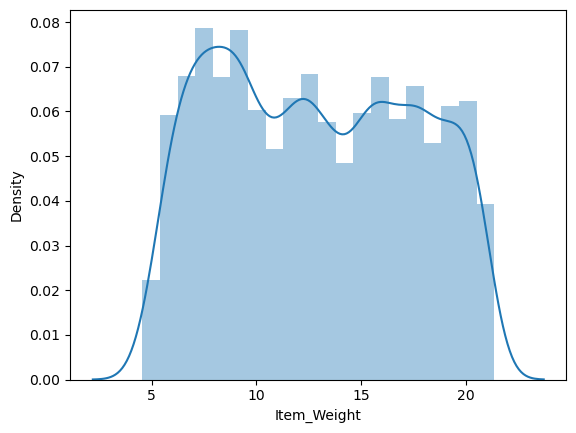

In [101]:
sns.distplot(df['Item_Weight'],hist=True)
df['Item_Weight'].skew()

### <div class="alert alert-info"> Here the column 'Item_Weight' has no skew. So we can perform mean or median or mode. Here i have used mean, mean represents the average values of a set of numbers.</div>

In [55]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df.head(9)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category_frequency_encoded,Identifier_Label,Fat_Content_Label,Outlet_Label,Outlet_Size_Label,Outlet_Location_Type_Label,Outlet_Type_Label
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,682,156,1,9,1,0,1
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,445,8,2,3,1,2,2
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,425,662,1,9,1,0,1
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1232,1121,2,0,3,2,0
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,910,1297,1,1,0,2,1
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,648,758,2,3,1,2,2
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1200,696,2,1,0,2,1
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1200,738,1,5,1,2,3
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,856,440,2,7,3,1,1


### So for the column 'Item_Weight', I have used mean to fill the missing values in the column. Mean would replace with the missing values in the column.

### For the column 'Outlet_Size', since it is a categorical column, we use mode to fill the missing values in the dataset.

In [8]:
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df.head(9)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986


### For the column 'Outlet_Size', we can fill using mode. Mode represents the most used value.

In [9]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### <div class="alert alert-info"> Now we don't have any missing values since we have filled the missing values.</div>

<a id='feature_datatypes'></a>
# <font color=red>  2. Handling Feature Datatypes</font>

### Here in handling feature datatypes, we check the datatypes of the columns in the dataset. And we change the datatypes of the column if they are different.

In [10]:
# check datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### <div class="alert alert-info"> Here are the datatypes of the columns in the dataset. Here the data types of the columns are seems to be correct. So there's no use of changing the data types of the columns.</div>

<a id='sparsity'></a>
# <font color=red> 3. Sparsity Removal</font>

### In missing variable, we find the percentage of missing values in the data set.

### In zero variable, we find the percentage of zeros in the data set. 

### In the overall variable, we add the percentage of both missing and zeros to get the total percentage of missing values and zeros in the data set. 

In [13]:
# check sparsity
df1 = pd.DataFrame(df)
missing = df1.isnull().mean() * 100
zero = (df1 == 0).mean() * 100
overall = (df1.isnull().sum().sum()) + ((df1 == 0).sum().sum()) / df1.size * 100
print('missing percentage')
print(missing)
print('\nzero percentage')
print(zero)
print('\noverall percentage')
print(overall)

missing percentage
Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

zero percentage
Item_Identifier              0.000000
Item_Weight                  0.000000
Item_Fat_Content             0.000000
Item_Visibility              6.171536
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.000000
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

overall percentage
0.5142946536821933


### <div class="alert alert-info"> Here we have already filled the missing values so the percentage of missing values is zero. By adding the percentage of missing values and zeros, we get the overall percentage as 0.5%. There is less percentage of missing values and zeros in sparse columns. So we can't remove the columns</div>

<a id='outlier'></a>
# <font color=red>4. Outlier Treatment</font>

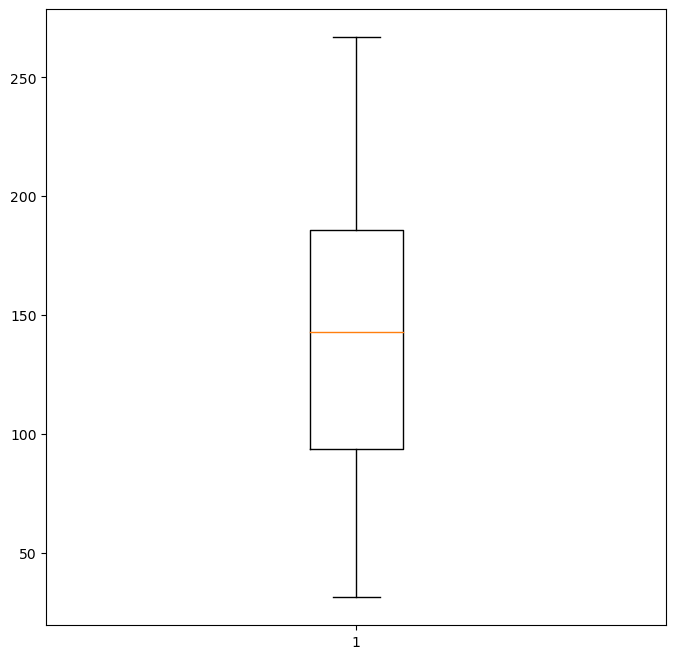

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\1320580665.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'], hist=True)


<Axes: xlabel='Item_MRP', ylabel='Density'>

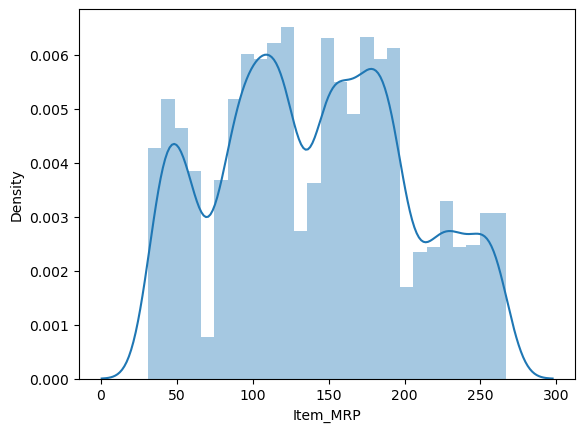

In [14]:
# box plot
plt.figure(figsize=(8,8))
plt.boxplot(df['Item_MRP'])
plt.show()
sns.distplot(df['Item_MRP'], hist=True)

In [15]:
df['Item_MRP'].skew()

0.1272022683110526

### <div class="alert alert-info">No outliers are there in the given boxplot for the column 'Item_MRP'. There's no need of performing any operations</div>

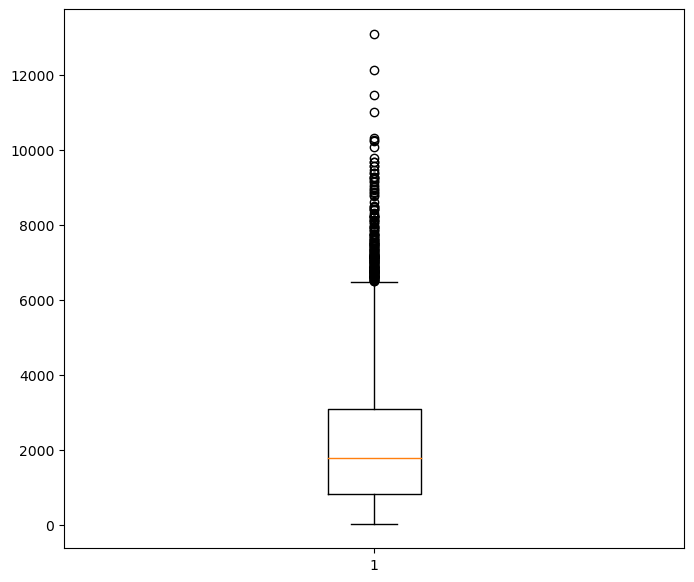

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\2592224019.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'],hist=True)


1.1775306028542796

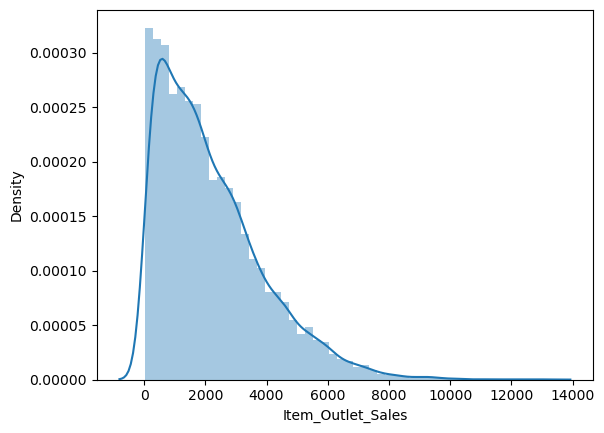

In [97]:
plt.figure(figsize=(8,7))
plt.boxplot(df['Item_Outlet_Sales'])
plt.show()
sns.distplot(df['Item_Outlet_Sales'],hist=True)
df['Item_Outlet_Sales'].skew()

### Here we can detect the outliers in boxplot of column 'Item_Outlet_Sales' and it is right skewed by using the skew function

<a id='iqr'></a>
## <font color=red> 4.1 Removing outliers using IQR</font>

In [18]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [19]:
# IQR
percentile25 = df['Item_Outlet_Sales'].quantile(0.25)
percentile75 = df['Item_Outlet_Sales'].quantile(0.75)

### By using the quantile 0.25 and quantile 0.75 we get the 25% and 75% of the column 'Item_Outlet_Sales'.

In [20]:
percentile25

834.2474

In [21]:
percentile75

3101.2964

In [22]:
iqr = percentile75 - percentile25

### Here we calculate the iqr. Interquartile Range(IQR) is a measure of statistical dispersion that represents the range between the first quartile and the third quartile in a data set

In [23]:
iqr

2267.049

In [24]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr 

In [25]:
print('Upper limit is: ',upper_limit)
print('Lower limit is: ',lower_limit)

Upper limit is:  6501.8699
Lower limit is:  -2566.3261


### We have calculated the upper and the lower limits of the column 'Item_Outlet_Sales' by using the iqr

In [26]:
# capping
new_df = df.copy()
new_df['Item_Outlet_Sales'] = np.where(new_df['Item_Outlet_Sales'] > upper_limit,upper_limit,
np.where(new_df['Item_Outlet_Sales'] < lower_limit,lower_limit,
        new_df['Item_Outlet_Sales']))

### capping is a method where we set the maximum values of a feature to a certain value. For example, the upper and lower values for not being an outlier is 80 and 5 and there are three outliers which are 85, 3, 90. So now these three outliers will be adjusted with the upper and lower values means the outlier 85 will be adjusted to 80, outlier 3 will be adjusted to 5 and outlier 90 will be adjusted to 80.

### We can even use trimming where we can remove the outliers but in some cases when there are majority number of outliers, those outliers will be removed which means most of the data will be removed. Which is not good.

In [27]:
new_df.shape

(8523, 12)

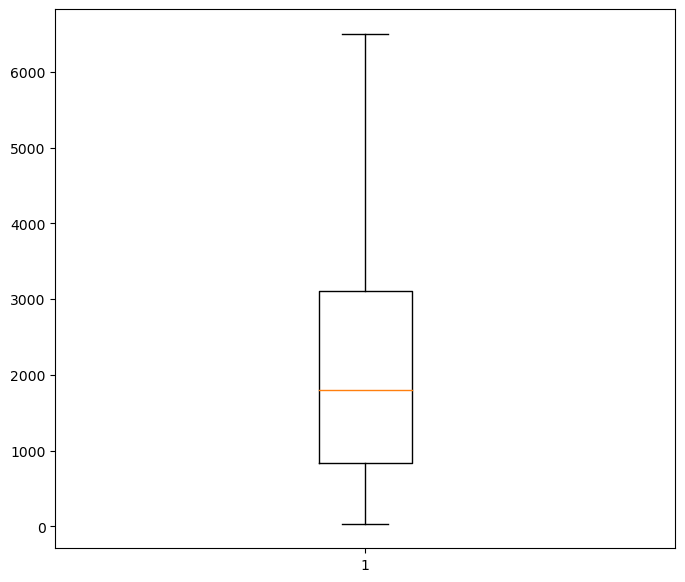

In [28]:
plt.figure(figsize=(8,7))
plt.boxplot(new_df['Item_Outlet_Sales'])
plt.show()

### <div class="alert alert-info"> After using capping, we have no outliers in the box plot</div>

<a id='encoding'></a>
# <font color=red> 5. Feature Encoding </font>

<a id='onehot'></a>
## <font color=red> 5.1 One hot encoding</font>

### One hot encoding is used to represent categorical variables with multiple categories. For example, in the column 'Item_Fat_Content', we have three different variables like low fat, regular, etc. So, they would be divided into multiple categories.

In [29]:
# one hot encoding
encoder = ce.OneHotEncoder(cols=['Item_Fat_Content'],use_cat_names=True)
data_encoded = encoder.fit_transform(df)
data_encoded

,Item_Identifier,Item_Weight,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_LF,Item_Fat_Content_reg,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0,0,0,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,0,1,0,0,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,1,0,0,0,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,0,1,0,0,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,1,0,0,0,0,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0,0,0,0,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,0,1,0,0,0,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,1,0,0,0,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,0,1,0,0,0,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [30]:
# one hot encoding
encoder = ce.OneHotEncoder(cols=['Item_Type'],use_cat_names=True)
data_encoded = encoder.fit_transform(df)
data_encoded

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type_Dairy,Item_Type_Soft Drinks,Item_Type_Meat,Item_Type_Fruits and Vegetables,Item_Type_Household,Item_Type_Baking Goods,...,Item_Type_Starchy Foods,Item_Type_Others,Item_Type_Seafood,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,1,0,0,0,0,0,...,0,0,0,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,0,1,0,0,0,0,...,0,0,0,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,0,0,1,0,0,0,...,0,0,0,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,0,0,0,1,0,0,...,0,0,0,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,0,0,0,0,1,0,...,0,0,0,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,0,0,0,0,0,0,...,0,0,0,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,0,0,0,0,0,1,...,0,0,0,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,0,0,0,0,0,0,...,0,0,0,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,0,0,0,0,0,0,...,0,0,0,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<a id='label'></a>
## <font color=red> 5.2 Label encoding </font>

### Label encoding is a technique that converts categorical variables into numerical format. For example, the column 'Item_Type', there are different types like Meat, Fruits and Vegetables, Household and etc. So, numeric value will be assigned to each of the variables.

In [31]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encoded'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,encoded
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,1
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,2


In [32]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['encoded'] = label_encoder.fit_transform(df['Item_Type'])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,encoded
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,13
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,0
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,8
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,13


<a id='binary'></a>
## <font color=red> 5.3 Binary encoding</font>

### Binary encoding is used to transform categorical data into numeric data by encoding categories as integers and then converting them into binary code.

In [33]:
# binary encoding
binary = ce.BinaryEncoder(cols=['Item_Fat_Content'])
encoded = binary.fit_transform(df)
encoded

,Item_Identifier,Item_Weight,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,encoded
0,FDA15,9.300,0,0,1,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,4
1,DRC01,5.920,0,1,0,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.500,0,0,1,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,10
3,FDX07,19.200,0,1,0,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,6
4,NCD19,8.930,0,0,1,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0,1,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,13
8519,FDS36,8.380,0,1,0,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,0
8520,NCJ29,10.600,0,0,1,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,8
8521,FDN46,7.210,0,1,0,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,13


### <div class="alert alert-info"> Here in the 'Item_Fat_Content' column, each of the variable is assigned in a binary format. For example, Low fat is represented as 1 in numerical format and 01 in binary format. Same as for Regular variable is represented as 2 in numerical format and 10 in binary format.</div>

<a id='target'></a>
## <font color=red> 5.4 Target encoding </font>

### Target encoding it is also known as mean encoding which replaces each categorical value with average value of target variable for that category

In [34]:
# target encoding
df = pd.read_csv('Train.csv')
tar = ce.TargetEncoder(cols='Item_Type')
df_1 = tar.fit_transform(df['Item_Type'],df['Item_Outlet_Sales'])
df_new = df_1.join(df.drop('Item_Type',axis=1))
df_new

,Item_Type,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,2232.542597,FDA15,9.300,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,2006.511735,DRC01,5.920,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2158.977911,FDN15,17.500,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,2289.009592,FDX07,19.200,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,2258.784300,NCD19,8.930,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,2277.321739,FDF22,6.865,Low Fat,0.056783,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,1952.971207,FDS36,8.380,Regular,0.046982,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,2010.000265,NCJ29,10.600,Low Fat,0.035186,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,2277.321739,FDN46,7.210,Regular,0.145221,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<a id='frequency'></a>
## <font color=red> 5.5 Frequency encoding</font>

### Now we have to perform frequency encoding, first we need to check the value counts of the column 'Item_Type' by using .value_counts()

In [35]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### In frequency encoding, it transforms the categorical variables into numerical values based on their frequency in a dataset.

### Here when i have used value counts in the column 'Item_Type', i have got the count of the unique values of that column. So, in frequency encoding, the categorical variables will replace with the frequency of that variable

In [36]:
# frequency encoding
df = pd.read_csv('Train.csv')
frequency = df['Item_Type'].value_counts(normalize=False)
df['Category_frequency_encoded'] = df['Item_Type'].map(frequency)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Category_frequency_encoded
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,682
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,445
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,425
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1232
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,1200
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,648
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,520
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,1200


<a id='skewness'></a>
## <font color=red> 6. Skewness Removal </font>

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\1588695641.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'], hist = True)


0.0824262091221237

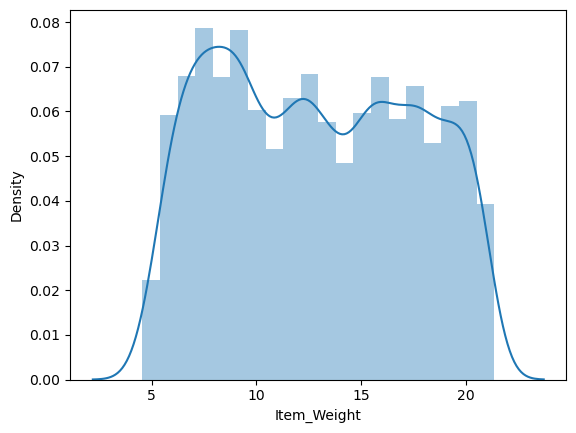

In [37]:
sns.distplot(df['Item_Weight'], hist = True)
df['Item_Weight'].skew()

### Since the 'Item_Weight' column is zero skew. There's no need to use transformation for it.

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\874651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'], hist = True)


0.1272022683110526

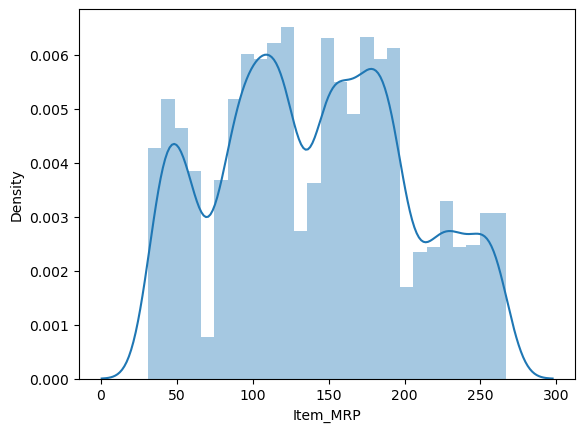

In [38]:
sns.distplot(df['Item_MRP'], hist = True)
df['Item_MRP'].skew()

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\1880045793.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'], hist = True)


1.1775306028542796

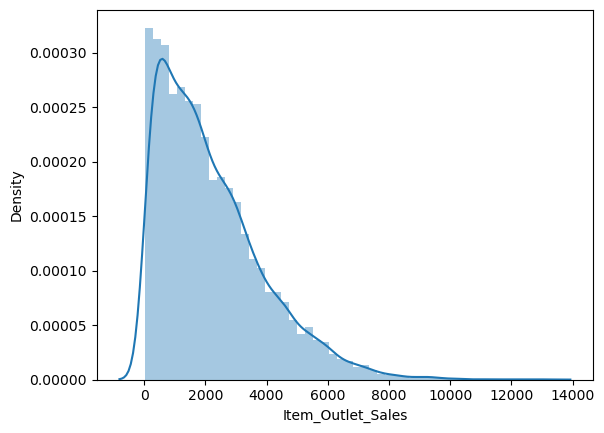

In [39]:
sns.distplot(df['Item_Outlet_Sales'], hist = True)
df['Item_Outlet_Sales'].skew()

### Since it is positive skew, we should use transformation methods for it.

<a id='log'></a>
## <font color=red> 6.1 Log transformation</font>

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\2362707359.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_transformation,hist=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

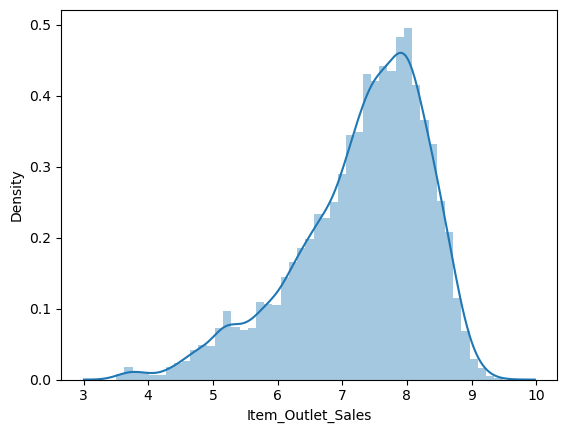

In [40]:
# log transformation
log_transformation = np.log(df['Item_Outlet_Sales'])
sns.distplot(log_transformation,hist=True)

In [41]:
log_transformation.skew()

-0.887753343209305

### The skew should be between -0.5 to 0.5. When we have used log transformation. The skew is showing -0.8. Since it is exceeding the skewness, we have to use another transformation method for it.

### Log transformation is used to transform skewed or highly skewed data into a more symmetrical or normally distributed form.

<a id='sqrt'></a>
## <font color=red> 6.2 Square root transformation</font>

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\3637884538.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sqrt_transformation,hist=True)


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

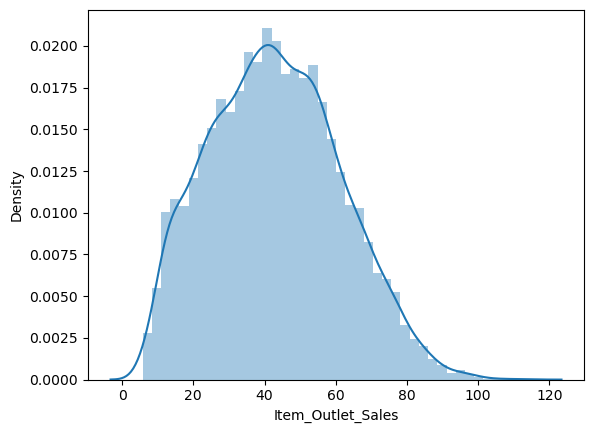

In [42]:
# square root transformation
sqrt_transformation = np.sqrt(df['Item_Outlet_Sales'])
sns.distplot(sqrt_transformation,hist=True)

In [43]:
sqrt_transformation.skew()

0.23467599347099247

### Square root transformation is a technique that applies the square root function to each data point in a dataset. It is used to stabilize the variance of data and reduce the impact on extreme values.

<a id='boxcox'></a>
## <font color=red> 6.3 Box cox transformation</font>

### After using both square root and box cox transformations, i got the values as 0.2 and -0.0. We have taken box cox transformation since it is perfectly skewed. Box cox transformation helps us to address non-normally distributed data by transforming it to normalize the data.

C:\Users\shema\AppData\Local\Temp\ipykernel_5004\2354092938.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(box_cox_transformed,hist=True)


<Axes: ylabel='Density'>

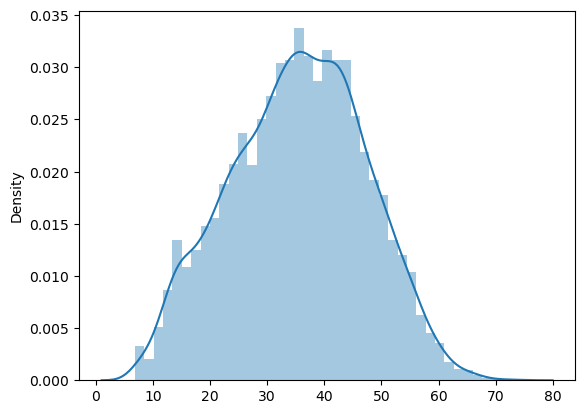

In [44]:
# box cox transformation
from scipy.stats import boxcox
transformation, lambda_param = boxcox(df['Item_Outlet_Sales'])
box_cox_transformed = transformation
sns.distplot(box_cox_transformed,hist=True)

<a id='cih'></a>
# <font color=red> 7. Class Imbalance Handler</font>

<a id='performing_cih'></a>
## <font color=red> 7.1 Performing class imbalance handler</font>

In [45]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

### Here i have taken a categorical variable and done value_counts to check the variables which have been used.
### Here the variables are not equal to each other. So now we need to use SMOTE to treat all the variables equally.
### SMOTE(Synthetic Minority Over-Sampling Technique) is used in Class Imbalance when the number of instances in minority class is lower than the number of instances in majority class. So we use SMOTE, it generates synthetic samples for minority class, increasing the representation in the dataset.

In [57]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Identifier_Label'] = label_encoder.fit_transform(df['Item_Identifier'])
df['Fat_Content_Label'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['Outlet_Label'] = label_encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size_Label'] = label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type_Label'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type_Label'] = label_encoder.fit_transform(df['Outlet_Type'])

### Here i have used label encoding to change the categorical variables to numerical values, because statistics takes only numerical values only.

In [58]:
X = df[['Identifier_Label','Item_Weight','Fat_Content_Label','Item_Visibility','Item_MRP','Outlet_Label','Outlet_Establishment_Year','Outlet_Size_Label','Outlet_Location_Type_Label','Outlet_Type_Label','Item_Outlet_Sales']]
Y = df['Item_Type']

### For the variable X, I've taken all the columns in the dataset except the 'Item_Type' column.
### For the variable Y, I've taken the column 'Item_Type'.

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

### Here i have used train_test_split to split the variables X and Y and put into X_train and Y_train

In [60]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [61]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

### After using the smote method, i have set the X_train and Y_train variables to a new variables called X_train_smote and Y_train_smote.

In [62]:
from collections import Counter
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_smote))

Before SMOTE:  Counter({'Fruits and Vegetables': 852, 'Snack Foods': 850, 'Household': 639, 'Frozen Foods': 584, 'Dairy': 472, 'Canned': 451, 'Baking Goods': 449, 'Health and Hygiene': 364, 'Soft Drinks': 320, 'Meat': 307, 'Breads': 173, 'Hard Drinks': 157, 'Others': 125, 'Starchy Foods': 105, 'Breakfast': 73, 'Seafood': 45})
After SMOTE:  Counter({'Meat': 852, 'Hard Drinks': 852, 'Fruits and Vegetables': 852, 'Dairy': 852, 'Seafood': 852, 'Frozen Foods': 852, 'Canned': 852, 'Baking Goods': 852, 'Household': 852, 'Soft Drinks': 852, 'Snack Foods': 852, 'Breads': 852, 'Others': 852, 'Health and Hygiene': 852, 'Starchy Foods': 852, 'Breakfast': 852})


### We can see the count difference of the target variable y_train and y_train_smote. So here we have created new synthetic samples for filling the minority class

<Axes: title={'center': 'Class distribution after appying SMOTE'}>

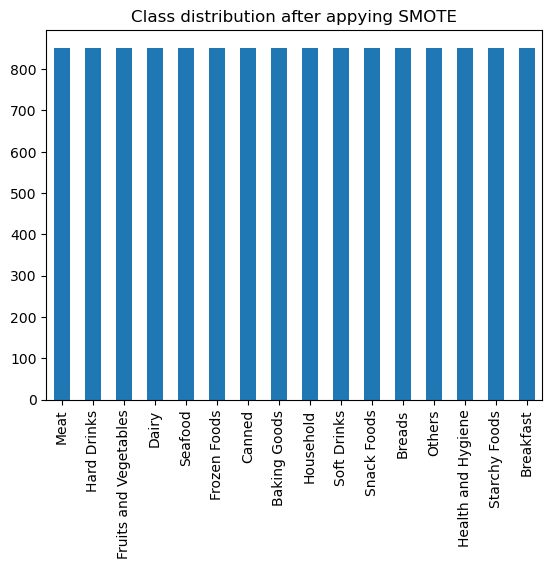

In [63]:
pd.Series(y_train_smote).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE')

<a id='multicollinearity'></a>
# <font color=red> 8. Multicollinearity Handler</font>

In [64]:
df.shape

(8523, 19)

In [65]:
df.dtypes

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content               object
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                    object
Outlet_Location_Type           object
Outlet_Type                    object
Item_Outlet_Sales             float64
Category_frequency_encoded      int64
Identifier_Label                int32
Fat_Content_Label               int32
Outlet_Label                    int32
Outlet_Size_Label               int32
Outlet_Location_Type_Label      int32
Outlet_Type_Label               int32
dtype: object

### Here, we can take datatypes of numeric values only, categorical variables cannot be taken. 

In [66]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64'), dtype('int32')],
      dtype=object)

### When checking for unique datatypes, there are four types of datatypes, object, float64, int64 and int32.

In [67]:
num = ['int64','float64']
num_var = list(df.select_dtypes(include=num))

### Here i have taken a variable called 'num' and i have added what type of datatype columns i need. So i have taken int64 and float64 datatypes. Then in the num_var variable, i have selected the columns of the datatypes int64 and float64.

In [68]:
num_var

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Category_frequency_encoded']

In [69]:
df = df[num_var]

### We put this specific columns stored in num_var variable will be stored in df.

In [70]:
df.shape

(8523, 6)

### We have to check for the null values of these five columns.

In [71]:
df.isnull().sum()

Item_Weight                   0
Item_Visibility               0
Item_MRP                      0
Outlet_Establishment_Year     0
Item_Outlet_Sales             0
Category_frequency_encoded    0
dtype: int64

### We have checked the null values in the selected columns. And we don't have any null values, but if we have, we have to either remove it or fill it.

In [72]:
X = df.iloc[:,0:5]
y = df.iloc[:,-4]

### We take two variables X and y. In X, we store all the columns. In y, we store only one column.

In [73]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Here i have used train_test_split to split the variables X and y and put into X_train and y_train

In [76]:
corr_matrix = X_train.corr()

### Then for the X_train variable we are calculation the correlation matrix and storing it in the variable called corr_matrix

In [77]:
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.020518,0.017835,-0.009590,0.018860
Item_Visibility,-0.020518,1.000000,0.002537,-0.083213,-0.125009
Item_MRP,0.017835,0.002537,1.000000,0.013613,0.563732
Outlet_Establishment_Year,-0.009590,-0.083213,0.013613,1.000000,-0.037021
Item_Outlet_Sales,0.018860,-0.125009,0.563732,-0.037021,1.000000


<Axes: >

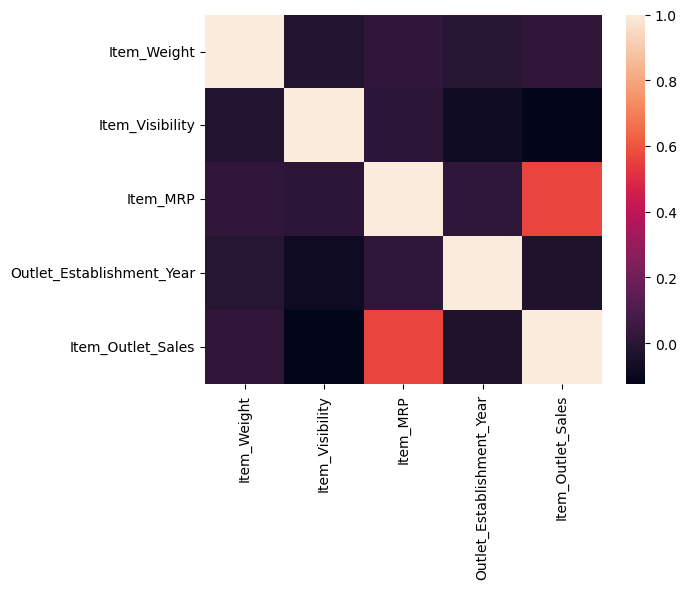

In [78]:
sns.heatmap(corr_matrix)

In [79]:
def correlation(df, threshold):
    correlated_col = set()
    corrmatrix = df.corr()
    for i in range(len(corrmatrix.columns)):
        for j in range(i):
            if abs(corrmatrix.iloc[i,j]) > threshold:
                coln = corrmatrix.columns[i]
                correlated_col.add(coln)
    return correlated_col

### I have defined correlation to identify the columns that have correlation coefficient greater than the given threshold value.

In [80]:
correlation(X_train, 0.5)

{'Item_Outlet_Sales'}

### I have kept threshold as 0.5 means 50%, then only the column 'Item_Outlet_Sales' has correlation

### We have to remove the column 'Item_Outlet_Sales' because it is highly correlated.

In [81]:
corr_feature = correlation(X_train, 0.5)

### Here we put the correlation(X_train, 0.5) in the variable corr_feature

In [82]:
corr_feature

{'Item_Outlet_Sales'}

In [83]:
X_train.shape, X_test.shape

((5966, 5), (2557, 5))

In [84]:
X_train.drop(labels=corr_feature, axis=1, inplace=True)
X_test.drop(labels=corr_feature, axis=1, inplace=True)

### Here we drop the column 'Item_Outlet_Sales' in the X_train. Before we have 5 columns after we exectued this code now we have 4 columns. 

In [85]:
X_train.shape, X_test.shape

((5966, 4), (2557, 4))

<a id='dimensionality'></a>
# <font color=red> 9. Dimensionality reduction</font>

<a id='feature_selection'></a>
## <font color=red> 9.1 Feature selection </font>

In [100]:
df1 = pd.DataFrame(df, columns=['Item_Weight','Item_MRP'])
correlation = df1.corr()
relevant_features = correlation['Item_Weight'].abs().nlargest(2).index
df_reduced = df1[relevant_features]
df_reduced

,Item_Weight,Item_MRP
0,9.300,249.8092
1,5.920,48.2692
2,17.500,141.6180
3,19.200,182.0950
4,8.930,53.8614
...,...,...
8518,6.865,214.5218
8519,8.380,108.1570
8520,10.600,85.1224
8521,7.210,103.1332


<a id='pca'></a>
## <font color=red> 9.2 PCA </font>

In [87]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
feature_columns = ['Item_Weight','Item_MRP','Item_Outlet_Sales']
df_features = df[feature_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_reduced = pd.DataFrame(pca_data, columns=['PC1','PC2'])
df_reduced

,PC1,PC2
0,1.839867,-0.915925
1,-1.845404,-1.565327
2,0.021871,1.099228
3,-0.065462,1.522704
4,-1.521695,-0.869752
...,...,...
8518,1.017528,-1.455590
8519,-1.095743,-1.006045
8520,-1.067022,-0.490250
8521,-0.628812,-1.314028


### PCA(Principal Component Analysis) it is a dimensionality reduction technique used to transform high-dimensional data into low-dimensional space while preserving the most important pattern and variances in the data.

In [88]:
df_features.shape, df_reduced.shape

((8523, 3), (8523, 2))

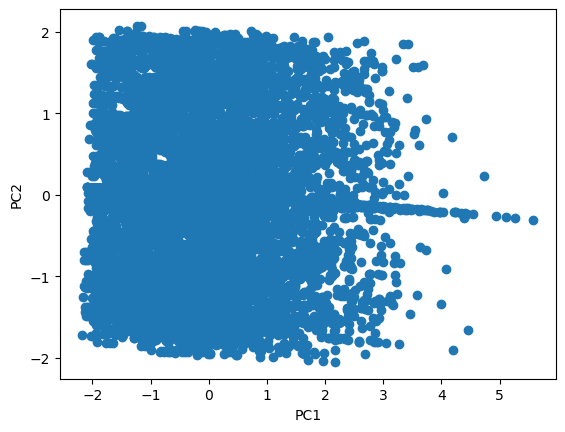

In [89]:
plt.scatter(df_reduced['PC1'],df_reduced['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### <div class="alert alert-info"> Here we perform PCA for the features 'Item_Weight', 'Item_MRP' and 'Item_Outlet_Sales' from the dataframe df. The features are scaled using standardscaler and pca is applied to reduce the dimensionality of the data. The transformed data is stored in the df_reduced variable.</div>

<a id='scaling'></a>
# <font color=red> 10. Feature Scaling</font>

<a id='minmax'></a>
## <font color=red> 10.1 Min max scaling</font>

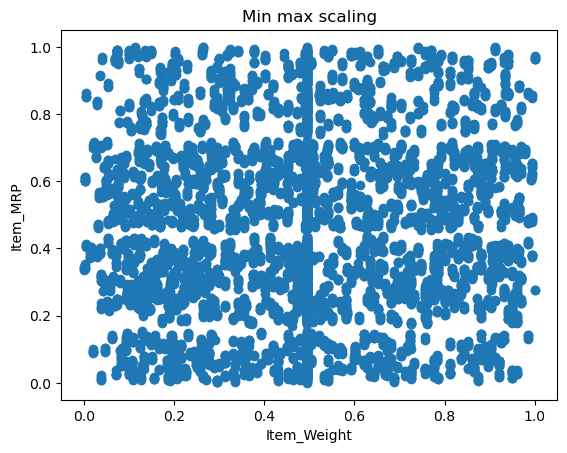

In [90]:
# min max scaling
feature_column = ['Item_Weight','Item_MRP']
df_features = df[feature_column]
min_v = df_features.min()
max_v = df_features.max()
normalized = (df_features - min_v) / (max_v - min_v)
plt.scatter(normalized['Item_Weight'], normalized['Item_MRP'])
plt.xlabel('Item_Weight')
plt.ylabel('Item_MRP')
plt.title('Min max scaling')
plt.show()

### <div class="alert alert-info"> Here we perform min max scaling for the selected features 'Item_Weight' and 'Item_MRP' from the dataframe. Min max scaling transforms the data such that it is scaled to a specific range, between 0 and 1.</div>

<a id='zscore'></a>
## <font color=red> 10.2 z-score</font>

In [91]:
# z score
feature_columns = df[['Item_MRP','Item_Outlet_Sales']]
mean = feature_columns.mean()
std = feature_columns.std()
standardized = (feature_columns - mean) / std
print(standardized)

      Item_MRP  Item_Outlet_Sales
0     1.747351           0.910548
1    -1.488936          -1.018381
2     0.010040          -0.049235
3     0.660011          -0.849053
4    -1.399138          -0.695332
...        ...                ...
8518  1.180714           0.349894
8519 -0.527270          -0.956346
8520 -0.897155          -0.579066
8521 -0.607941          -0.196713
8522 -1.052199          -0.829545

[8523 rows x 2 columns]


### <div class="alert alert-info"> Here we perform Z-score standardization on the selected features 'Item_MRP' and 'Item_Outlet_Sales' from the dataframe. Z-score standardization transforms the data such that it has a mean of 0 and a standard deviation of 1.</div>

<a id='lr'></a>
# <font color=red>11. Linear Regression</font>

<a id='mlr'></a>
## <font color=red>11.1 Using Multiple Linear Regression</font>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
DF = pd.read_csv('Train.csv')

In [6]:
DF['Item_Weight'] = DF['Item_Weight'].fillna(DF['Item_Weight'].mean())
DF['Outlet_Size'] = DF['Outlet_Size'].fillna(DF['Outlet_Size'].mode()[0])

In [8]:
#performing label encoding for categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
DF['Item_Fat_Content'] = label_encoder.fit_transform(DF['Item_Fat_Content'])
DF['Item_Type'] = label_encoder.fit_transform(DF['Item_Type'])
DF['Item_Identifier'] = label_encoder.fit_transform(DF['Item_Identifier'])
DF['Outlet_Size'] = label_encoder.fit_transform(DF['Outlet_Size'])
DF['Outlet_Location_Type'] = label_encoder.fit_transform(DF['Outlet_Location_Type'])
DF['Outlet_Type'] = label_encoder.fit_transform(DF['Outlet_Type'])
DF['Outlet_Identifier'] = label_encoder.fit_transform(DF['Outlet_Identifier'])
DF['Outlet_Establishment_Year'] = label_encoder.fit_transform(DF['Outlet_Establishment_Year'])

In [11]:
lr_X = DF[['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
lr_y = DF['Item_Outlet_Sales']

In [12]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(lr_X, lr_y, test_size=0.2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
logreg = LinearRegression()
logreg.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = logreg.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)
print('R2 score:', r2)

Mean squared error: 1346086.3199483296
Root mean squared error: 1160.209601730795
R2 score: 0.5111527658507179


<a id='ols'></a>
## <font color =red>11.2 OLS method</font> 

In [16]:
import statsmodels.api as sm
X_OLS = sm.add_constant(lr_X)

In [17]:
model = sm.OLS(lr_y, lr_X)
results = model.fit()

In [18]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.813
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              3369.
Date:                Fri, 30 Jun 2023   Prob (F-statistic):                        0.00
Time:                        00:44:47   Log-Likelihood:                         -72500.
No. Observations:                8523   AIC:                                  1.450e+05
Df Residuals:                    8512   BIC:                                  1.451e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

<a id='dt_rf'></a>
# <font color=red>12. Decision Tree & Randon Forest</font>

<a id='dt'></a>
## <font color=red>12.1 Decision Tree</font>

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [20]:
DT_y_pred = regressor.predict(X_test)
DT_y_pred

array([ 908.817 , 2756.412 ,  300.9416, ...,  387.4956, 1965.4416,
       1310.2944])

In [21]:
DT_mse = mean_squared_error(y_test, DT_y_pred)
DT_rmse = np.sqrt(DT_mse)
DT_r2 = r2_score(y_test, DT_y_pred)
print('Mean Squared Error: ', DT_mse)
print('Root Mean Squared Error: ', DT_rmse)
print('R2 Score: ', DT_r2)

Mean Squared Error:  2354230.103257113
Root Mean Squared Error:  1534.3500589034802
R2 Score:  0.14503337752337075


<a id='rf'></a>
## <font color=red>12.2 Random Forest</font>

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [23]:
RF_y_pred = rf.predict(X_test)
RF_y_pred

array([2511.69721 , 2349.501672,  426.624666, ...,  457.93724 ,
       2062.362106, 1298.969142])

In [24]:
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_rmse = np.sqrt(RF_mse)
RF_r2 = r2_score(y_test, RF_y_pred)
print('Mean Squared Error: ', RF_mse)
print('Root Mean Squared Error: ', RF_rmse)
print('R2 Score: ', RF_r2)

Mean Squared Error:  1183641.8373931437
Root Mean Squared Error:  1087.9530492595459
R2 Score:  0.5701464089946153
